# _Python for Scientific Data Analysis_


#    Matplotlib

## Section 1: The Very Basics of Plotting with Matplotlib (continued)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Simple Plot Customization
Now, the plot does not give an indication of what is actually displayed.  Let's change that:

#### _Plot and Axis Labels_
 

- Labels to the coordinates, given by _plt.xlabel_ , _plt.ylabel_ , and _plt.title_ .  We can further alter the font for these labels.

See here for more details: <br>
[https://matplotlib.org/stable/api/\_as\_gen/matplotlib.pyplot.xlabel.html]() and 
[https://matplotlib.org/stable/api/\_as\_gen/matplotlib.pyplot.title.html]()

and some details here for altering font:
[https://matplotlib.org/stable/gallery/text\_labels\_and\_annotations/text\_fontdict.html#sphx-glr-gallery-text-labels-and-annotations-text-fontdict-py]()

- A few other things to note for labels that will be applicable later.  First, you can use ``r'[your label]'`` to write things in math text instead of plain text (useful if you have LaTeX symbols or variables as labels).   And second, on that note, you can use ``$`` to write LaTeX'd labels. 


#### _Data Customiziation_

We also can change ...

- *Sizes* of symbols

In a scatter plot by the _s_ variable (e.g. ``plt.scatter(x,y,s=75)`` sets the symbol size to 75).  Note that the default symbol size for a simple scatter plot with dots is about 50.

In a line plot, you can also connect points by markers.  In this case, you can set the marker size by the ``ms`` keyword 
e.g.
``plt.plot(xarray,xarray*a+b,color='black',ms=20,marker='*')``

-  The *type* of symbols -- "marker" in matplotlib-speak --  for points in a scatter plot denoted by ``marker = [some value]``.  E.g. `` plt.scatter(x,y,marker="<")`` is a left-pointing triangle; `` marker="s" `` is a square.  Here is the full list of markers:
  [https://matplotlib.org/stable/api/markers_api.html]()

  
-   For lines, *linestyle* changes the style of the line.  E.g. plt.plot(x,y,linestyle='dashdot') (or linestye = '.-'). gives a dash-dot line; while plt.plot(x,y,linestyle='solid') gives a solid line.

  Here is a full list of linestyles:
  [https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html]()


- *c* controls the marker color.  E.g. ``plt.scatter(x,y,c='b')`` will plot blue symbols, 'c' will plot cyan, etc.  Similarly, *edgecolors* controls the color of the edge (i.e. outline) of the marker.  So ``plt.scatter(x,y,c='b',edgecolors='black')`` would now make the edges of the plot symbols (again, 'marker' in matplotlib-speak) black.

  Here is a full list of named colors:
  [https://matplotlib.org/stable/gallery/color/named_colors.html]()

- *alpha* controls the transparency.  E.g. ``alpha = 1`` is fully opaque, while `` alpha = 0`` is transparent (invisible).  

0.8944656702484951 0.4654653874019018


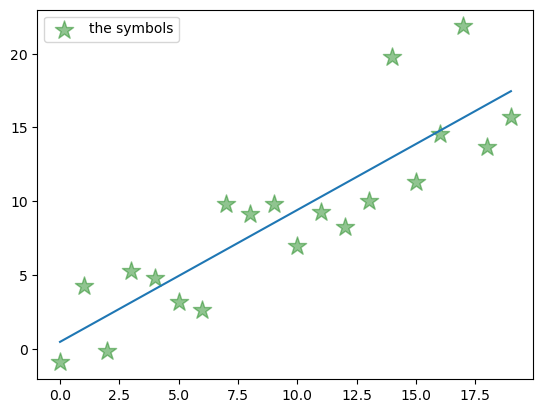

In [2]:
###(Ex_1.3)-revised

import matplotlib.pyplot as plt
import numpy as np 

xarray=np.arange(20)   
yarray=np.arange(20)+3*np.random.randn(20) 

#https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
#a polynomial fit of degree one
a,b=np.polyfit(xarray,yarray,1)


plt.scatter(xarray,yarray,marker="*",alpha=0.5,s=190,c='forestgreen',label='the symbols')
plt.plot(xarray,xarray*a+b)
print(a,b) # this shows as 0.939,-0.817 for my example

plt.legend(loc='best')
#plt.legend(loc='lower right')
#plt.show()
#![](./code/sect1/figures/Ex1_3.png)

Again, see here for more details on many of these:

[https://matplotlib.org/stable/api/\_as\_gen/matplotlib.pyplot.scatter.html]() <br>
[https://matplotlib.org/stable/api/markers\_api.html]()<br>
[https://matplotlib.org/stable/gallery/lines\_bars\_and\_markers/linestyles.html]()<br>
[https://matplotlib.org/stable/tutorials/colors/colors.html]()

#### _Legends_

We can also attach legends to denote what is being plotted through ``plt.legend``.  To make this work, you add a *label* to each array of data you are plotting.  Then call *legend*.  So where do you put the legend?   You can control that answer with the *loc* keyword.  There are a lot of named values for *loc* that are self-explanatory: e.g. ``loc='upper left'`` puts the legend in the upper-left part of the plot.  ``loc='best' `` chooses the location amongst named ones with the least overlap with plotted stuff (jargon-y description: "least overlap with drawn artists").   Or, you can provide a 2-tuple giving he coordinates of the lower-left corner of the legend in axis coordinates. 

 Other keywords include *title*, *framealpha*, etc.  See below for the full API documentation:

[https://matplotlib.org/stable/api/\_as\_gen/matplotlib.pyplot.legend.html]() <br>

#### A Worked Example ...

Below is an example of more customized plot incorporating all of these elements.

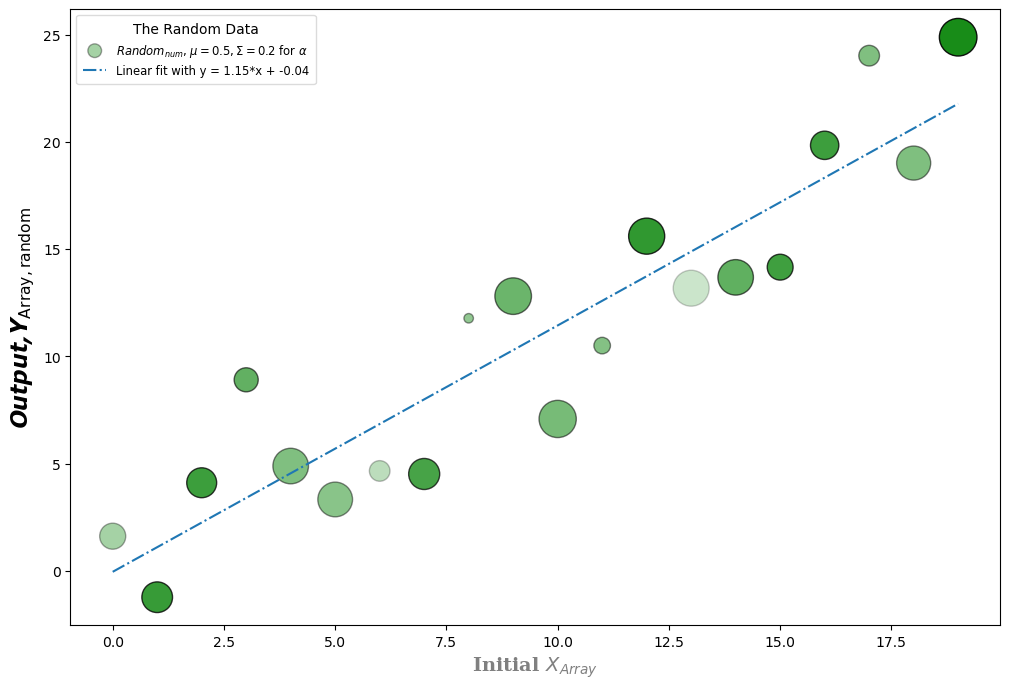

In [10]:
###(Ex_1.4)

#import matplotlib.pyplot as plt
import numpy as np 
xarray=np.arange(20)
yarray=np.arange(20)+3*np.random.randn(20)

 #https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
 #a polynomial fit of degree one

a,b=np.polyfit(xarray,yarray,1)

#set symbol size to a random value between 0 and 1

#same as 5*np.random.rand(20) 
   #since the length of yarray is 20 elements
symsizeval=5*np.random.random(len(yarray))  
symsizeval*=150

#set alpha value to be a random number drawn from a normal distribution with mean of 0.5 and sigma of 0.2
mu,sigma=0.5,0.2
alphaval=np.random.normal(mu,sigma,len(yarray))

# a simple cheat to catch randomized alpha values that are not between 0.1 and 1
bad=np.where((alphaval <= 0.1) | (alphaval > 1))
alphaval[bad]=0.5

 #line plot of xarray and yarray
   #varying color, marker, size, and transparency
plt.scatter(xarray,yarray,color='g',marker='o',s=symsizeval,edgecolor='black',alpha=alphaval,
      label=r'$Random_{num}$, $\mu = 0.5, \Sigma = 0.2$ for $\alpha$')

plt.plot(xarray,xarray*a+b,color='tab:blue',
     linestyle='-.',label='Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b)) 
     #linestyle is same as linestyle='dashdot'

plt.xlabel('Initial $X_{Array}$',font='serif',size=14,color='gray',weight='heavy')
plt.ylabel(r'Output,Y$_{\rm Array, random}$',font='Verdana',size=16,style='italic',weight='bold')

plt.legend(loc='upper left',fontsize='small',borderpad=0.6,markerscale=0.5,
    shadow=False,framealpha=0.7,title='The Random Data')
  


#plt.show()



#### Plotting Limits

By default, _**matplotlib**_ automatically sets axis limits.   But sometimes its default limits are not ideal/don't make sense for your application.   So like any good plotting package, we can manually adjust the limits.   

For now, we will describe just the simplest possible tuning of axis limits: we will reserve a more complete discussion for the next section.   


Anyway, with _plt_ the limits are set by ``plt.[x,y]lim([min number],[max number])``  

E.g. ``plt.xlim(1,100)`` sets the x-axis limits on the plot to be between 1 and 100.   ``plt.ylim(5,500)`` sets the y-axis limits on the plot to be between 5 and 500.   

Note that the commands for adjusting limits will be different with the axes container described below. Stay tuned for the second set of lecture notes covering that.

Below is an example of the same figure as above with the axis limits changed.  The limits can be defined as a hard-coded number or as a variable value (e.g. ``plt.xlim(0,np.max(array))``.


(30.0, -5.0)

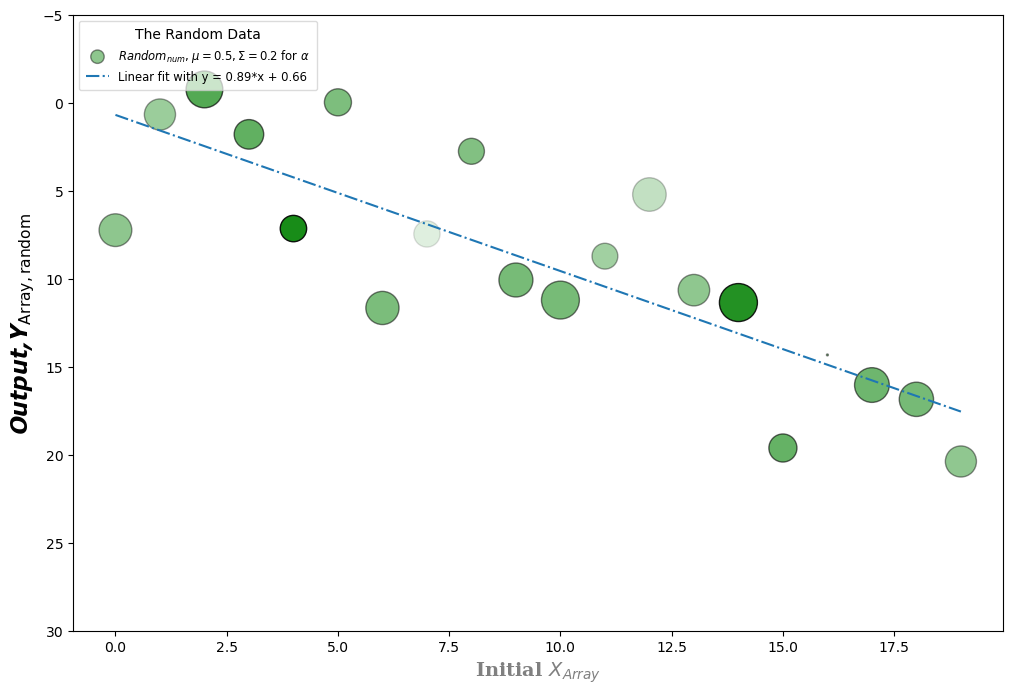

In [11]:
###(Ex_1.4)

#import matplotlib.pyplot as plt
import numpy as np 
xarray=np.arange(20)
yarray=np.arange(20)+3*np.random.randn(20)

 #https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
 #a polynomial fit of degree one

a,b=np.polyfit(xarray,yarray,1)

#set symbol size to a random value between 0 and 1

#same as 5*np.random.rand(20) 
   #since the length of yarray is 20 elements
symsizeval=5*np.random.random(len(yarray))  
symsizeval*=150

#set alpha value to be a random number drawn from a normal distribution with mean of 0.5 and sigma of 0.2
mu,sigma=0.5,0.2
alphaval=np.random.normal(mu,sigma,len(yarray))

# a simple cheat to catch randomized alpha values that are not between 0.1 and 1
bad=np.where((alphaval <= 0.1) | (alphaval > 1))
alphaval[bad]=0.5

 #line plot of xarray and yarray
   #varying color, marker, size, and transparency
plt.scatter(xarray,yarray,color='g',marker='o',s=symsizeval,edgecolor='black',alpha=alphaval,
      label=r'$Random_{num}$, $\mu = 0.5, \Sigma = 0.2$ for $\alpha$')

plt.plot(xarray,xarray*a+b,color='tab:blue',
     linestyle='-.',label='Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b)) 
     #linestyle is same as linestyle='dashdot'

plt.xlabel('Initial $X_{Array}$',font='serif',size=14,color='gray',weight='heavy')
plt.ylabel(r'Output,Y$_{\rm Array, random}$',font='Verdana',size=16,style='italic',weight='bold')

plt.legend(loc='upper left',fontsize='small',borderpad=0.6,markerscale=0.5,
    shadow=False,framealpha=0.7,title='The Random Data')

###adjusted limits

#plt.xlim(-5,22.5)
#plt.ylim(-5,30)

#plt.xlim(22.5,-5)
plt.ylim(30,-5)

#plt.ylim(-5,np.max(yarray)+2)
#plt.xlim(np.min(xarray)-4,np.max(yarray)+2)


#plt.show()

### The Fig, Axes Objects ...

Now we can get more sophisticated by splitting plt up into separate **_fig_** and **_ax_** objects by calling ```plt.subplots```.  Here's an example: ```fig,axes = plt.subplots()```.  For reasons that take too long to explain right now, this will give us more control over the presentation of our plots later.   And -- you guessed it -- it will allow us to do *_subplots_*. 

 BE CAREFUL, though: some of the syntax to do different things changes in subtle ways. For instance, instead of ```plt.xlabel('[name of label'])``` the call is ```axes.set_xlabel(['name of label'])```

You can also modify the plot dimensions using the **_figsize__** variable within **_subplots_** : ```fig,axes = plt.subplots(figsize=(xsize,ysize))```, where *xsize* and *ysize* are numbers.

Here's an example of the previous plot with less-obnoxious formatting and using the ```fig,axes``` call to create a single plot of a specified size/dimension.

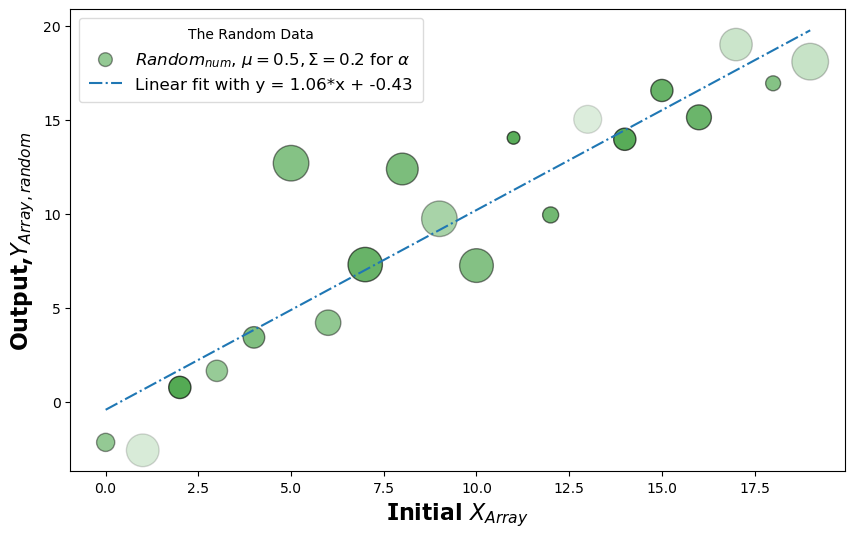

In [12]:
###(Ex_1.5)


import numpy as np 
#this will allow use NumPy's random number generator AND use the polynomial fit

xarray=np.arange(20)
yarray=np.arange(20)+3*np.random.randn(20)

 #https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
 #a polynomial fit of degree one

a,b=np.polyfit(xarray,yarray,1)

#set symbol size to a random value between 0 and 1

#same as 5*np.random.rand(20) since the length of yarray is 20 elements
symsizeval=5*np.random.random(len(yarray))  
symsizeval*=150

#set alpha value to be a random number drawn from a normal distribution with mean of 0.5 and sigma of 0.2
mu,sigma=0.5,0.2
alphaval=np.random.normal(mu,sigma,len(yarray))

# a simple cheat to catch randomized alpha values that are not between 0.1 and 1
bad=np.where((alphaval <= 0.1) | (alphaval > 1))
alphaval[bad]=0.5


fig,axes=plt.subplots(figsize=(10,6))   

 #line plot of xarray and yarray
   #varying color, marker, size, and transparency
axes.scatter(xarray,yarray,color='g',marker='o',s=symsizeval,edgecolor='black',alpha=alphaval,
      label=r'$Random_{num}$, $\mu = 0.5, \Sigma = 0.2$ for $\alpha$')

axes.plot(xarray,xarray*a+b,color='tab:blue',
  linestyle='-.',label='Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b)) 
  #linestyle is same as linestyle='dashdot'

axes.set_xlabel('Initial $X_{Array}$',font='Verdana',size=16,color='black',weight='bold')
axes.set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',size=16,color='black',weight='bold')

axes.legend(loc='upper left',fontsize='large',borderpad=0.6,markerscale=0.5,
    shadow=False,framealpha=0.7,title='The Random Data')


# plt.show()



#![](./code/sect1/figures/Ex1_5.png)

### Plots with Error Bars

All measurements have uncertainties associated with them, so we need to plot data with error bars.   The _**errorbar**_ function allows you to do this.  _errorbar_ can be called with plt. (e.g. _**plt.errorbar**_) or with the axes object (_**axes.errorbar**_).

The full API documentation is here:
[https://matplotlib.org/stable/api/\_as\_gen/matplotlib.pyplot.errorbar.html]()


Key variables include _yerr_ (array of Y errors), _xerror_ (array of X errors), _ecolor_ (color of errorbars), _elinewidth_ (their width), etc.  If you want to plot just the data (no connecting lines) then you the _ls_ keyword is important (set it to ``ls='none'`` in this case).    _**errorbar**_ uses keywords from _**plt.plot**_ , so these will be a bit different than _**plt.scatter**_.  E.g. _ms_ is the markersize (not _s_ as in _**plt.scatter**_) and the scaling is different than in a scatter plot (see code below). _markeredgecolor_ is used, not _edgecolor_.   The combination of ``capsize`` and ``markeredgewidth`` control the appearance of caps.

Here is a very simple errorbar plot:

<ErrorbarContainer object of 3 artists>

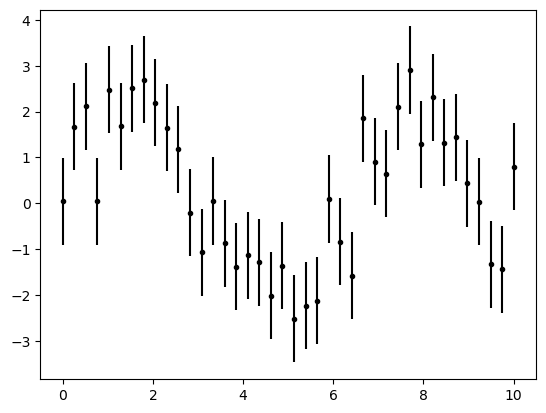

In [13]:
x = np.linspace(0, 10, 40)
const = 0.95
y = 2*np.sin(x) + const * np.random.randn(40)

#plt.style.use('seaborn') #just to change things up a bit
plt.style.use('default')
#plt.errorbar(x, y, yerr=const,ls='none') #just looks like blue vertical lines
#plt.errorbar(x, y, yerr=const,ls='none',marker='o') #dots with blue vertical lines
plt.errorbar(x, y, yerr=const,fmt='.k')

Note the different formatting options.  ``ls = 'none' `` just gives you vertical, lines, adding the marker value gives you that symbol plus the lines.  Instead using the ``fmt`` formatting keyword gives you the shortcut string notation parameter to specify the marker.


Here's a case where we adjust the error color and linewidth while giving a cap to the errors:

<ErrorbarContainer object of 3 artists>

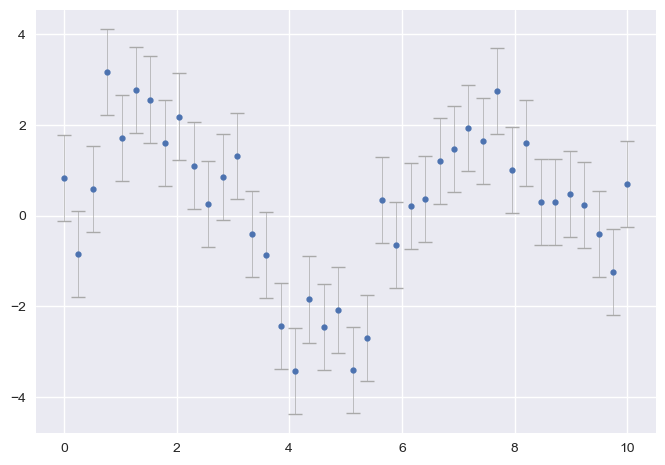

In [16]:
x = np.linspace(0, 10, 40)
const = 0.95
y = 2*np.sin(x) + const * np.random.randn(40)

#plt.style.use('default')
#plt.style.use('seaborn') #note: this will cause an error in the latest Matplotlib version
plt.style.use('seaborn-v0_8')#just to change things up a bit

#plt.errorbar(x, y, yerr=const,ls='none') #just looks like blue vertical lines
#plt.errorbar(x, y, yerr=const,ls='none',marker='o') #dots with blue vertical lines
plt.errorbar(x, y, yerr=const,ls='none',marker='.',ecolor='darkgray',capsize=5,elinewidth=.5,markeredgewidth=1)


Here is an example of an errorbar plot where we define the fig, axes objects and construct the plot from the axes object:

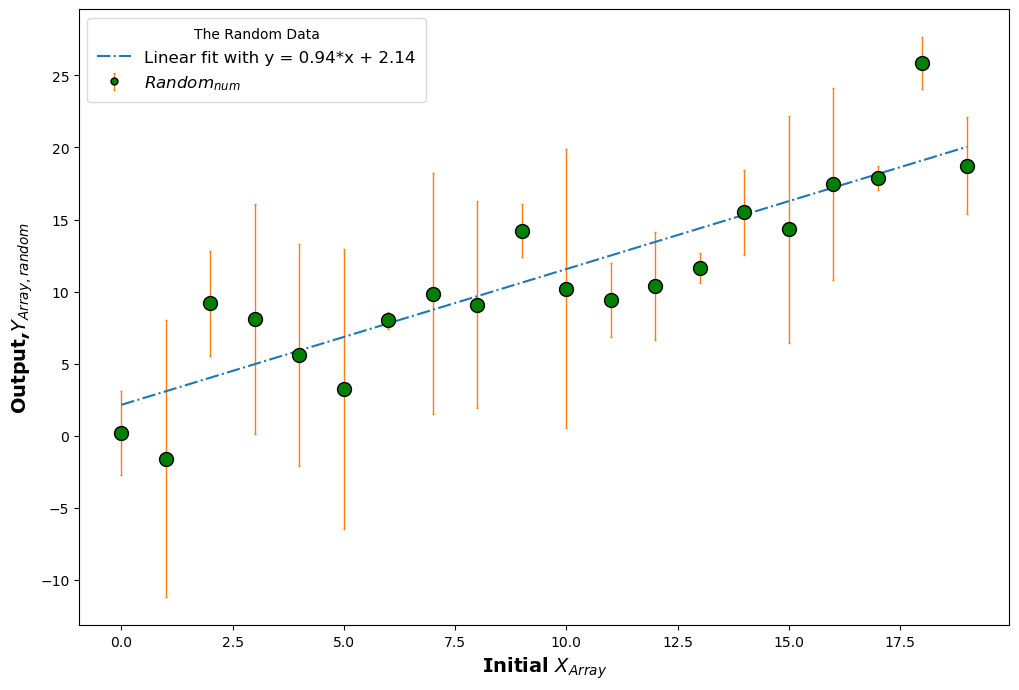

In [17]:
###(Ex_1.6)


plt.style.use('default')
xarray=np.arange(20)
yarray=np.arange(20)+3*np.random.randn(20)

#create a gaussian distribution of errors centered on 3 with standard deviation of 0.25
 #mu_error,sigma_error=3,0.25 #not used
 
error_yarray=10*np.random.random(20)+0.1

# remove bad error values: below 0.1
baderror=np.where(error_yarray < 0.1)
error_yarray[baderror]=0.1

a,b=np.polyfit(xarray,yarray,1,w=1/error_yarray)

#set symbol size to constant value
symsizeval=100

#set transparency to 1 for everything
alphaval=1

fig,axes=plt.subplots(figsize=(12,8))

 #line plot of xarray and yarray
   #varying color, marker, size, and transparency

#**** errorbar plot of xarray, yarray, and error_yarray
   #note that "ms" the 'markersize' has different units. 
       # 'markersize' values are = number of points; s in scattere plot = number_of_points**2.
axes.errorbar(xarray,yarray,error_yarray,ms=np.sqrt(symsizeval),ls='none',
     color='g',marker='o',markeredgecolor='black',linewidth=1,alpha=alphaval,
       capsize=1,ecolor='tab:orange',label=r'$Random_{num}$')

#plot the line fit
axes.plot(xarray,xarray*a+b,color='tab:blue',linestyle='-.',label='Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b)) #linestyle is same as linestyle='dashdot'

axes.set_xlabel('Initial $X_{Array}$',font='Verdana',size=14,color='black',weight='bold')
axes.set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',size=14,color='black',weight='bold')

axes.legend(loc='upper left',fontsize='large',borderpad=0.6,markerscale=0.5,
    shadow=False,framealpha=0.7,title='The Random Data')


# plt.show()

#![](./code/sect1/figures/Ex1_6.png)

Now, there are some limitations with what _errorbar_ can do.   For one, it does not allow you to imput an array for parameters like markersize, alpha, etc. in plots 1--5 because this is not allowed with _plot_ either.  To (mostly) work around this, you can plot the data in a _for_-loop or resort to other trickery.  Here's an example of the latter, where I sandwich an open circular symbol in between _errorbar_ and _scatter_ to effectively allow arrays for markersize, alpha, etc:

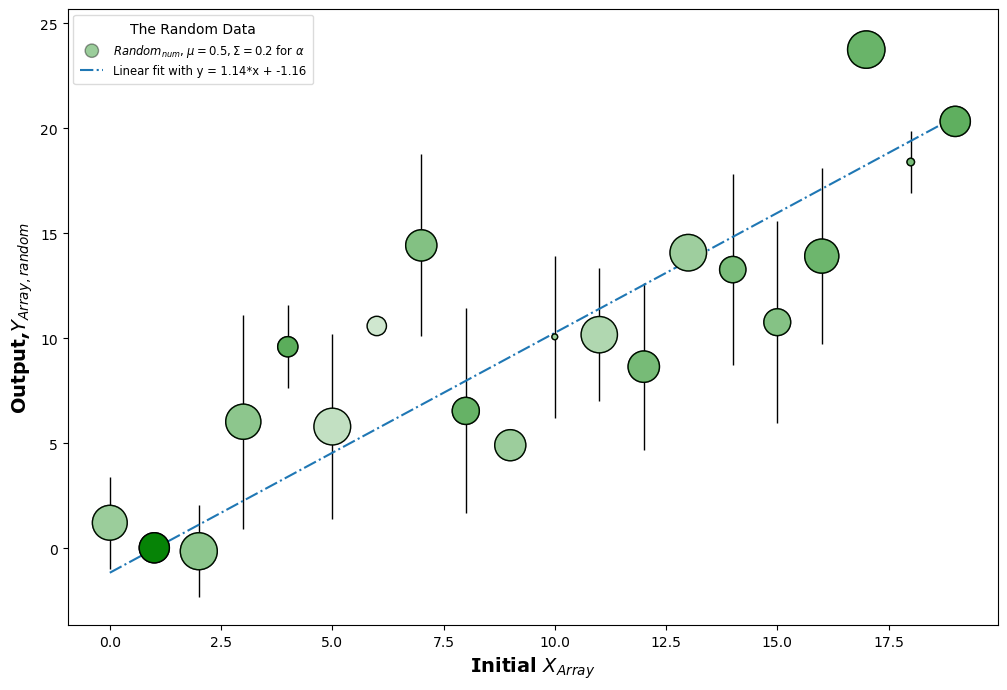

In [18]:
###(Ex_1.7)



xarray=np.arange(20)
yarray=np.arange(20)+3*np.random.randn(20)

error_yarray=5*np.random.random(20)+0.1

 #https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
 #a polynomial fit of degree one

a,b=np.polyfit(xarray,yarray,1,w=1/error_yarray)

#set symbol size to a random value between 0 and 1

symsizeval=5*np.random.random(len(yarray))  
  #same as 5*np.random.rand(20) since the length of yarray is 20 elements
symsizeval*=150

#set alpha value to be a random number drawn from a normal distribution with mean of 0.5 and sigma of 0.2
mu,sigma=0.5,0.2
alphaval=np.random.normal(mu,sigma,len(yarray))

# a simple cheat to catch randomized alpha values that are not between 0.1 and 1
bad=np.where((alphaval <= 0.1) | (alphaval > 1))
alphaval[bad]=0.5


fig,axes=plt.subplots(figsize=(12,8))

 #line plot of xarray and yarray
   #varying color, marker, size, and transparency

axes.errorbar(xarray,yarray,error_yarray,ms=.001,ls='none',color='g',marker='.',
   markeredgecolor='black',linewidth=1,ecolor='black',alpha=1,zorder=0)

axes.scatter(xarray,yarray,color='w',marker='o',s=symsizeval,edgecolor='black',alpha=1,zorder=1)

axes.scatter(xarray,yarray,color='g',marker='o',s=symsizeval,edgecolor='black',alpha=alphaval,
      label=r'$Random_{num}$, $\mu = 0.5, \Sigma = 0.2$ for $\alpha$',zorder=2)


axes.plot(xarray,xarray*a+b,color='tab:blue',zorder=0,linestyle='-.',
    label='Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b)) 
    #linestyle is same as linestyle='dashdot'

axes.set_xlabel('Initial $X_{Array}$',font='Verdana',size=14,color='black',weight='bold')
axes.set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',size=14,color='black',weight='bold')

axes.legend(loc='upper left',fontsize='small',borderpad=0.6,markerscale=0.5,
    shadow=False,framealpha=0.7,title='The Random Data')


 #plt.show()



#![](./code/sect1/figures/Ex1_7.png)

Note one other key parameter set with the plot calls: _**zorder**_.  _zorder_ functions in a similar way to _sendtoback_ or _bringtofront_ in Microsoft Powerpoint: i.e. it determines the stacking of different points (imagine a z-axis extending outward from your plot: _zorder_ determines the location of each thing being plotted along this axis).